In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from skopt import BayesSearchCV 

In [2]:
df = pd.read_csv('review_normalized.csv')
df.head()

,id,name,description,review,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,...,sleep_quality,rooms,check_in_front_desk,business_service,ratings,normalized_review,normalized_description,normalized_name,target,sentiment
0,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,We had a whisper-quiet queen deluxe room couty...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,whisper quiet queen deluxe room coutyard room ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
1,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,Great 3 night stay right after Thanksgiving. A...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,great night stay right thanksgiving agree prev...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
2,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,I hesitate to give this little gem a stellar r...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,hesitate give little gem stellar review fear a...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
3,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,You won't find a more conveniently located hot...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,find conveniently locate hotel nyc pace count ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
4,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,This small boutique hotel right off Times Squa...,4.0,50,very expensive,130.96,5,1,...,4.0,4.0,4.0,4.0,5.0,small boutique hotel right time square perfect...,experience magic time square step door escape ...,casablanca hotel time square,1,positive


In [3]:
df_copy = pd.DataFrame(df) #store a copy of the dataframe just in case

# Drop unnecssary columns:
df = df.drop(columns = ['normalized_review', 'normalized_description', 'normalized_name', 'target', 'id', 'name', 'description', 'review'])

df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,ratings,sentiment
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,positive
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,positive
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,positive


# Step 1: Check null

In [4]:
df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

In [5]:
df = df.dropna()

# re-check if all nulls are removed:

df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

# Step 2: Check data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239166 entries, 0 to 239165
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hotel_class          239166 non-null  float64
 1   no_of_amenities      239166 non-null  int64  
 2   price_level          239166 non-null  object 
 3   dist_to_metro        239166 non-null  float64
 4   no_of_attractions    239166 non-null  int64  
 5   award                239166 non-null  int64  
 6   no_of_reviews        239166 non-null  int64  
 7   service              239166 non-null  float64
 8   cleanliness          239166 non-null  float64
 9   value                239166 non-null  float64
 10  location             239166 non-null  float64
 11  sleep_quality        239166 non-null  float64
 12  rooms                239166 non-null  float64
 13  check_in_front_desk  239166 non-null  float64
 14  business_service     239166 non-null  float64
 15  ratings          

**Comments**:

- Categorical variable: price_level (nominal), sentiment (binary) (**hotel_class**: there are values from 0, 1, 1.5, ... 4.5 - weird! supposed to be categorical, but we will treat this as numerical due to this reason.)
- Numerical varibles: rest

## Change our target variable 'ratings' to Positive (1) if ratings >= 4 / Negative (0) if 0 <= ratings <= 3

In [7]:
# Re-arrange: Move our target variable 'ratings' to the last column:

# Get all columns except 'ratings'
columns = [col for col in df.columns if col != 'ratings']

# Reorder the DataFrame with 'ratings' as the last column
df = df[columns + ['ratings']]

# Now 'ratings' is the last column in df
df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,sentiment,ratings
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,5.0
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,5.0
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,5.0
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,5.0
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,positive,5.0


In [8]:
df['ratings'].value_counts()

ratings
5.0    101589
4.0     76777
3.0     31063
2.0     15680
1.0     14057
Name: count, dtype: int64

In [9]:
# 'ratings': 0 = negative, 1 = positive

df['ratings_binary'] = df['ratings'].apply(lambda val: 1 if val >= 4 else 0)

df = df.drop(['ratings'], axis = 1)

df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,sentiment,ratings_binary
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,1
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,1
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,1
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,1
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,positive,1


## Correlation heatmap (numerical variables)

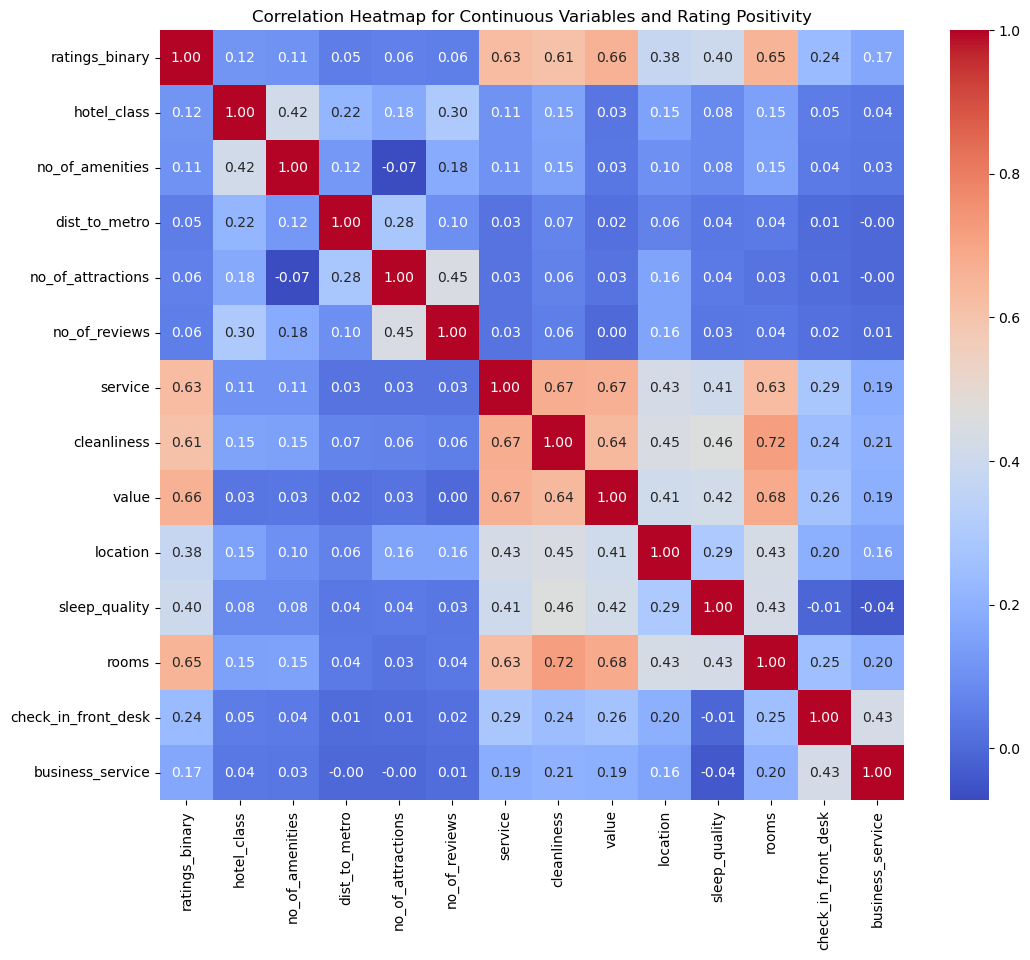

In [10]:
# Step 1: Identify all numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Calculate correlation matrix
corr_matrix = df[['ratings_binary'] + continuous_cols].corr()

# Generate heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Continuous Variables and Rating Positivity')
plt.show()

# Step 3: Feature engineering

## 3.1. Categorical variables: One-hot coding

- **Binary categorical variable ('sentiment')**

In [11]:
# 'Sentiment': 0 = negative, 1 = positive

df['sentiment'] = df['sentiment'].apply(lambda val: 1 if val == 'positive' else 0)

- **Nominal categorical variable ('price_level')**

In [12]:
df['price_level'].value_counts()

price_level
very expensive    120682
expensive          59009
moderate           46362
low                10287
Not Specified       2826
Name: count, dtype: int64

In [13]:
# Create a one-hot encoded set of the 'price_level' values, using pd.get_dummies() & Convert boolean columns to integer (0/1):
price_level_set = pd.get_dummies(df['price_level'], prefix = 'price_level').astype(int)

# Concatenate this set back to the dataFrame
df = pd.concat([df, price_level_set], axis=1)

# Let's now have a look:
df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,...,rooms,check_in_front_desk,business_service,sentiment,ratings_binary,price_level_Not Specified,price_level_expensive,price_level_low,price_level_moderate,price_level_very expensive
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,5.0,4.0,4.0,1,1,0,0,0,0,1
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,5.0,4.0,4.0,1,1,0,0,0,0,1
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1


In [14]:
# Now, we no longer need 'Property_Area' column after encoding it. Hence, we will drop this column:

df = df.drop(['price_level'], axis = 1)

## 3.2. Numerical variables: Standardize

We'll investigate the variance of columns having numerical variables in the dataset to determine which features should be standardized.

In [15]:
# Step 1: Identify all numeric columns
#numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
#continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Step 3: Calculate variance for only the continuous columns
variance = df[continuous_cols].var()

print(variance)

hotel_class            9.154227e-01
no_of_amenities        5.170557e+02
dist_to_metro          4.473735e+04
no_of_attractions      2.559658e+00
no_of_reviews          1.251214e+07
service                1.293059e+00
cleanliness            1.030005e+00
value                  1.226482e+00
location               6.614198e-01
sleep_quality          8.633781e-01
rooms                  1.055495e+00
check_in_front_desk    1.804572e-01
business_service       1.329029e-01
dtype: float64


In [16]:
# Calculate skewness for these columns
skewed_features = df[continuous_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness of Continuous Numeric Features:")
print(skewed_features)


Skewness of Continuous Numeric Features:
no_of_reviews          1.567536
no_of_amenities        0.640266
no_of_attractions      0.589653
dist_to_metro          0.514933
value                 -1.037590
rooms                 -1.165960
service               -1.468825
hotel_class           -1.617172
cleanliness           -1.704974
location              -2.150575
sleep_quality         -2.156172
check_in_front_desk   -3.154459
business_service      -4.543579
dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize based on high variance and skewness
columns_to_standardize = ['no_of_reviews', 'no_of_amenities', 'dist_to_metro', 
                          'no_of_attractions']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler only to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the standardized data
print(df[columns_to_standardize].head())

   no_of_reviews  no_of_amenities  dist_to_metro  no_of_attractions
0       1.085053        -0.401305       -0.62376           1.829899
1       1.085053        -0.401305       -0.62376           1.829899
2       1.085053        -0.401305       -0.62376           1.829899
3       1.085053        -0.401305       -0.62376           1.829899
4       1.085053        -0.401305       -0.62376           1.829899


In [18]:
# Re-check variance:

print(df[continuous_cols].var())

hotel_class            0.915423
no_of_amenities        1.000004
dist_to_metro          1.000004
no_of_attractions      1.000004
no_of_reviews          1.000004
service                1.293059
cleanliness            1.030005
value                  1.226482
location               0.661420
sleep_quality          0.863378
rooms                  1.055495
check_in_front_desk    0.180457
business_service       0.132903
dtype: float64


# Distribution of Target variable

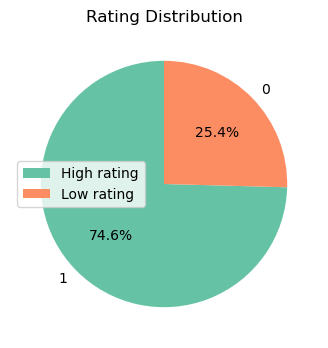

In [19]:
# First, check class distribution:

# Distribution of Target Variable ('ratings_binary')
plt.figure(figsize=(6, 4))
df['ratings_binary'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Rating Distribution')
plt.legend(labels=['High rating', 'Low rating'])
plt.ylabel('')  # Hides the y-label
plt.show()

**Comment: Target variable is extremely imbalanced. Our goal is to predict the minority class (customers with low overal ratings).**

# Data Modelling:

Here we will use all classification models:

- Logistic Regression
- Decision Tree
- Random Forest
- Näive Bayes
- Ensemble methods: Bagging, Boosting (AdaBoost, XGBoost)


**Why These Models Are Selected:**
- Logistic Regression: A simple baseline model for binary classification, offering interpretability.
- Decision Tree: Provides a non-linear decision-making process and is easy to visualize.
- Random Forest: An ensemble method that reduces overfitting, improves accuracy, and handles feature importance.
- Naive Bayes: Suitable for classification with categorical features and is efficient with a large dataset.
- Ensemble Methods (Bagging, Boosting):
    - Bagging: Helps in reducing variance (e.g., Random Forest).
    - Boosting: Focuses on reducing bias, with AdaBoost and XGBoost being powerful boosting algorithms for improving accuracy.

In [20]:
# Define feature variables (use all columns except 'ratings_binary') and target variable:
X = df.drop(columns=['ratings_binary'])
y = df['ratings_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify = y)

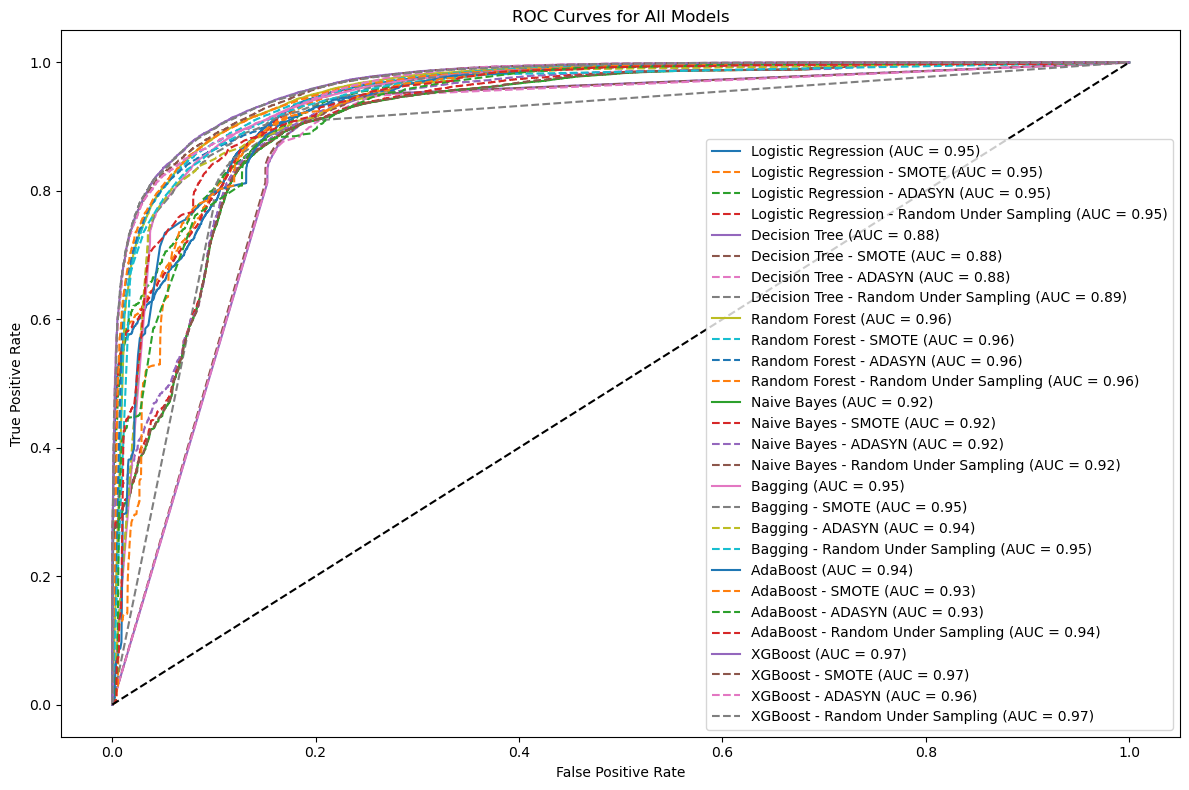

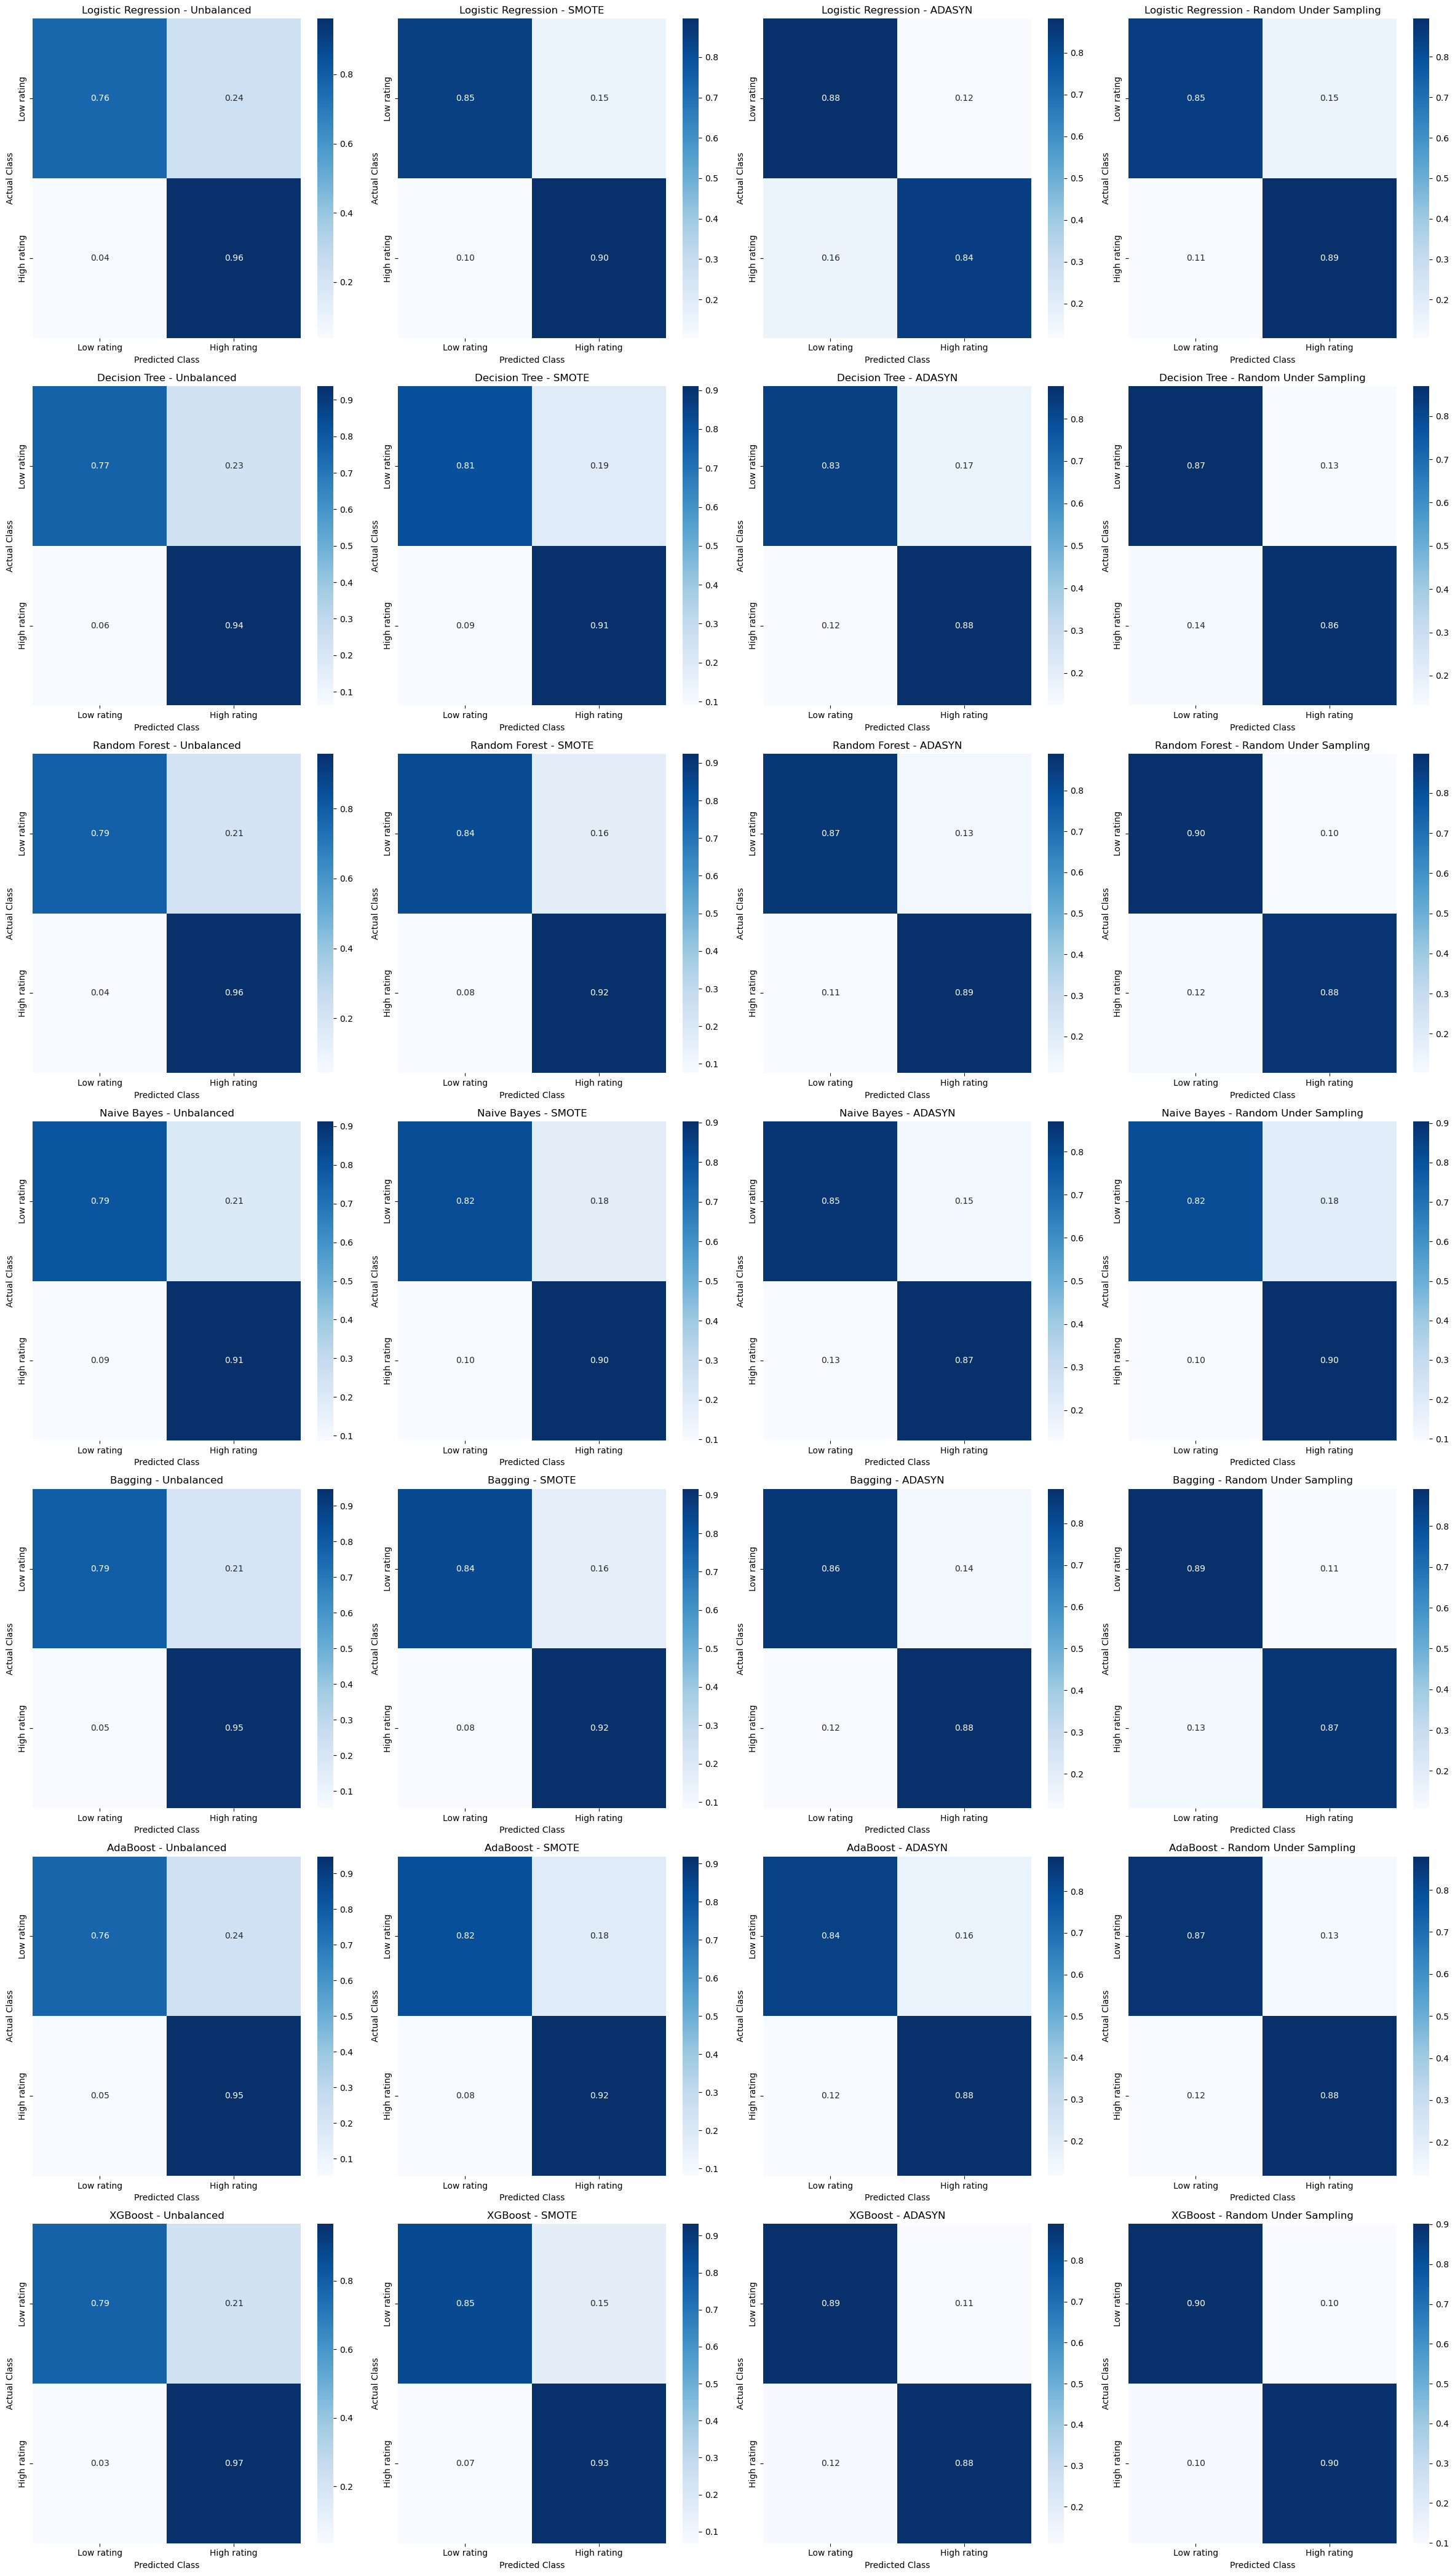

Model                            AdaBoost                                  \
Resampling Method                  ADASYN Random Under Sampling     SMOTE   
Accuracy                         0.871577              0.876636  0.892984   
F1-score ("low ratings" class)   0.767847              0.781469  0.795461   
Precision ("low ratings" class)  0.710370              0.710840  0.773607   
Recall ("low ratings" class)     0.835444              0.867681  0.818586   

Model                                        Bagging                        \
Resampling Method               Unbalanced    ADASYN Random Under Sampling   
Accuracy                          0.900761  0.876280              0.877807   
F1-score ("low ratings" class)    0.796572  0.779163              0.787617   
Precision ("low ratings" class)   0.831678  0.713212              0.705553   
Recall ("low ratings" class)      0.764309  0.858553              0.891283   

Model                                                Decision Tree  

In [21]:
import warnings
# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

def plot_confusion_matrices_and_roc(models, X_test, y_test, X_train, y_train, resampling_methods):
    """
    Plot ROC curves in one graph and confusion matrices across different models and resampling methods.
    
    Parameters:
    - models (dict): Dictionary of models to evaluate.
    - X_test (array-like): Feature matrix for testing.
    - y_test (array-like): True labels for testing.
    - X_train (array-like): Feature matrix for training.
    - y_train (array-like): True labels for training.
    - resampling_methods (dict): Dictionary of resampling methods to apply.
    
    Returns:
    - DataFrame: Table containing evaluation metrics for each model and resampling method.
    """
    num_models = len(models)
    num_resampling_methods = len(resampling_methods) + 1  # +1 for unbalanced data

    # Set up the figure for ROC curves
    plt.figure(figsize=(12, 8))
    
    results = []

    for i, (model_name, model) in enumerate(models.items()):
        # Train and evaluate on unbalanced data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC
        
        # Compute ROC and AUC for unbalanced data
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve for unbalanced data
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        
        # Collect evaluation metrics for unbalanced data
        metrics = {
            'Model': model_name,
            'Resampling Method': 'Unbalanced',
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision ("low ratings" class)': precision_score(y_test, y_pred, pos_label=0),
            'Recall ("low ratings" class)': recall_score(y_test, y_pred, pos_label=0),
            'F1-score ("low ratings" class)': f1_score(y_test, y_pred, pos_label=0)
        }
        results.append(metrics)
        
        # Loop through resampling methods
        for resample_name, resampler in resampling_methods.items():
            # Resample the training data
            X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            
            # Train and evaluate on resampled data
            model.fit(X_train_resampled, y_train_resampled)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            
            # Compute ROC and AUC for resampled data
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            
            # Plot ROC curve for resampled data
            plt.plot(fpr, tpr, linestyle='--', label=f'{model_name} - {resample_name} (AUC = {roc_auc:.2f})')

            # Collect evaluation metrics for resampled data
            metrics = {
                'Model': model_name,
                'Resampling Method': resample_name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision ("low ratings" class)': precision_score(y_test, y_pred, pos_label=0),
                'Recall ("low ratings" class)': recall_score(y_test, y_pred, pos_label=0),
                'F1-score ("low ratings" class)': f1_score(y_test, y_pred, pos_label=0)
            }
            results.append(metrics)

    # ROC curve - finalize the plot
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.title('ROC Curves for All Models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
    # Set up the figure for confusion matrices
    fig, axes = plt.subplots(num_models, num_resampling_methods, figsize=(24, 6 * num_models))

    for i, (model_name, model) in enumerate(models.items()):
        # Unbalanced data confusion matrix
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm_unbalanced = confusion_matrix(y_test, y_pred, normalize='true')
        sns.heatmap(cm_unbalanced, annot=True, fmt=".2f", cmap='Blues', ax=axes[i, 0],
                    xticklabels=["Low rating", "High rating"], 
                    yticklabels=["Low rating", "High rating"])
        axes[i, 0].set_title(f'{model_name} - Unbalanced')
        axes[i, 0].set_xlabel("Predicted Class")
        axes[i, 0].set_ylabel("Actual Class")

        # Resampling methods confusion matrices
        for j, (resample_name, resampler) in enumerate(resampling_methods.items(), start=1):
            X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            model.fit(X_train_resampled, y_train_resampled)
            y_pred = model.predict(X_test)
            cm_resampled = confusion_matrix(y_test, y_pred, normalize='true')
            sns.heatmap(cm_resampled, annot=True, fmt=".2f", cmap='Blues', ax=axes[i, j],
                        xticklabels=["Low rating", "High rating"], 
                        yticklabels=["Low rating", "High rating"])
            axes[i, j].set_title(f'{model_name} - {resample_name}')
            axes[i, j].set_xlabel("Predicted Class")
            axes[i, j].set_ylabel("Actual Class")

    plt.tight_layout()
    plt.show()
    
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    
    # Pivot the DataFrame to have metrics as rows
    results_pivot = results_df.pivot_table(index=['Model', 'Resampling Method'], 
                                           values=['Accuracy', 
                                                   'Precision ("low ratings" class)', 
                                                   'Recall ("low ratings" class)', 
                                                   'F1-score ("low ratings" class)'],
                                           aggfunc='mean').T  # Transpose for metrics as rows
    
    # Print the pivoted DataFrame
    print(results_pivot)
    
    return results_pivot

# Resampling methods
resampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Under Sampling': RandomUnderSampler(random_state=1234)
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=1234, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=1234),
    'Random Forest': RandomForestClassifier(random_state=1234),
    'Naive Bayes': GaussianNB(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1234),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=1234),
    'XGBoost': XGBClassifier(random_state=1234)
}

# Plot ROC curves + confusion matrices and print evaluation metrics:
results_pivot = plot_confusion_matrices_and_roc(models, X_test, y_test, X_train, y_train, resampling_methods)

**Comment**: 

- SMOTE is the best resampling method based on the f1-score (0.83) and precision (0.81), making it the most balanced method for predicting the minority class (Low ratings). It captures a good proportion of low ratings while also maintaining fewer false positives.

- Random Under-Sampling has the best recall (0.90), meaning it identifies more low ratings, but it sacrifices some precision.

It is most important for the company to correctly predict the actual low ratings, so that actions can be taken to intervene before dissatisfied customers leave and hence, minimize customer retention. Our focus is to correct identify True Negative and we will select the final model based on the highest recall of 'Low rating' class.

--> The best model is **XGBOOST using Random Under Sampling method**

# Hyperparamter tuning:

In [22]:
# Upgrade xgboost to avoid 'Future warning' notifications
!pip install --upgrade xgboost

## a. Grid Search - XGradientBoost

In [23]:
# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define the model for Grid Search
xgb_model = XGBClassifier(random_state=1234)

# Random Under Sampling
rus = RandomUnderSampler(random_state=1234)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid_search = grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters from Grid Search
print("Best parameters from Grid Search: ", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters from Grid Search:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


## b. Bayesian Search - XGradientBoost

In [24]:
# pip install scikit-optimize

In [25]:
# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Define the parameter grid for Bayesian Optimization
param_grid = {
    'n_estimators': (100, 500),  # Range for n_estimators
    'max_depth': (3, 10),        # Range for max_depth
    'learning_rate': (0.01, 0.3, 'uniform'),  # Uniform distribution for learning_rate
    'subsample': (0.5, 1.0),     # Range for subsample
    'colsample_bytree': (0.5, 1.0)  # Range for colsample_bytree
}

# Define the model for Bayesian Optimization
xgb_model = XGBClassifier(random_state=1234)

# Random Under Sampling
rus = RandomUnderSampler(random_state=1234)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(estimator=xgb_model,
                              search_spaces=param_grid,
                              scoring='roc_auc',
                              n_iter=50,
                              cv=5,
                              n_jobs=-1,
                              random_state=1234)
bayes_search = bayes_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters from Bayesian Optimization
print("Best parameters from Bayesian Optimization: ", bayes_search.best_params_)

/opt/software/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters from Bayesian Optimization:  OrderedDict([('colsample_bytree', 0.5682622886474867), ('learning_rate', 0.07840338693137887), ('max_depth', 4), ('n_estimators', 498), ('subsample', 0.854485524443364)])


## Comparison between Models using Default Hyperparameters vs Optimized Hyperparameters

Comparison of XGBoost models (Random Under Sampling) with Default hyperparameters vs Optimized hyperparameters:


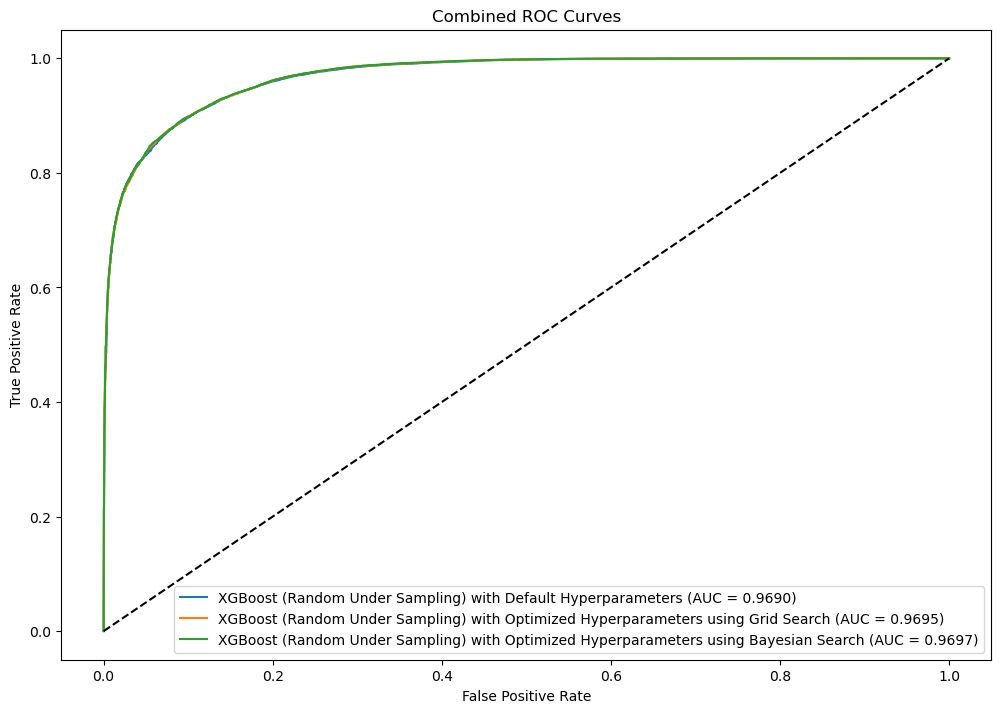

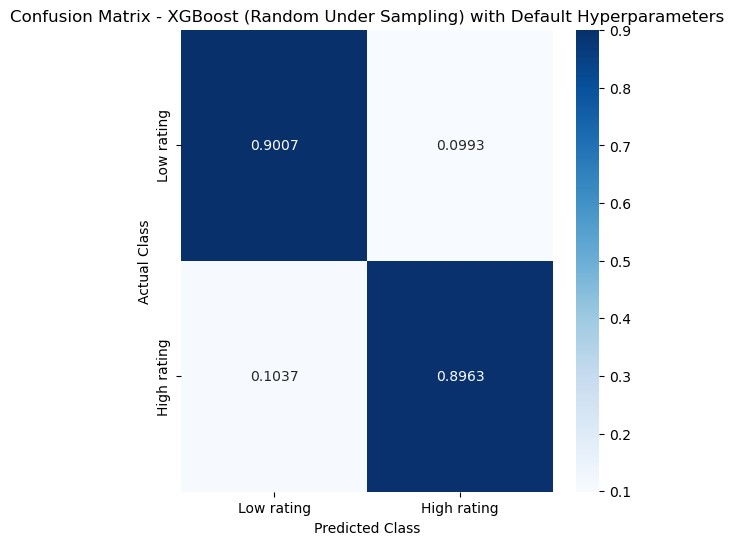

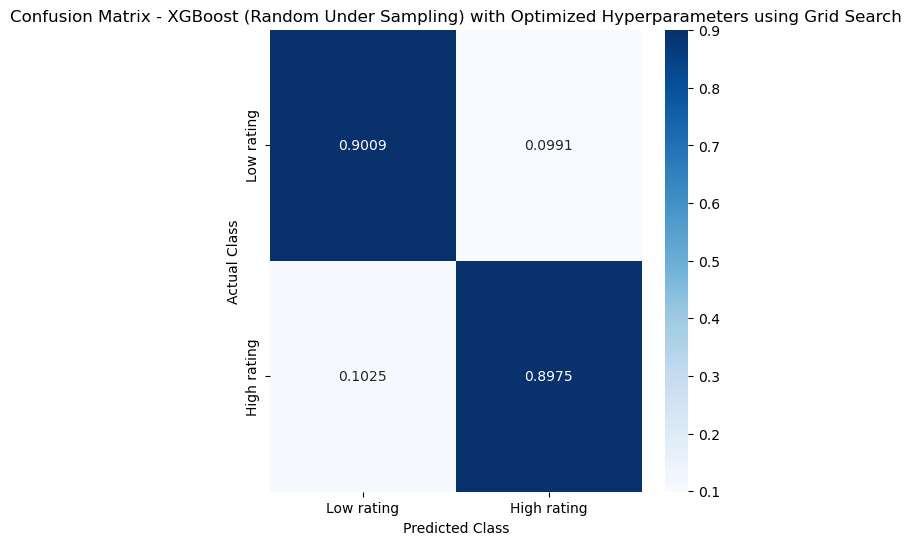

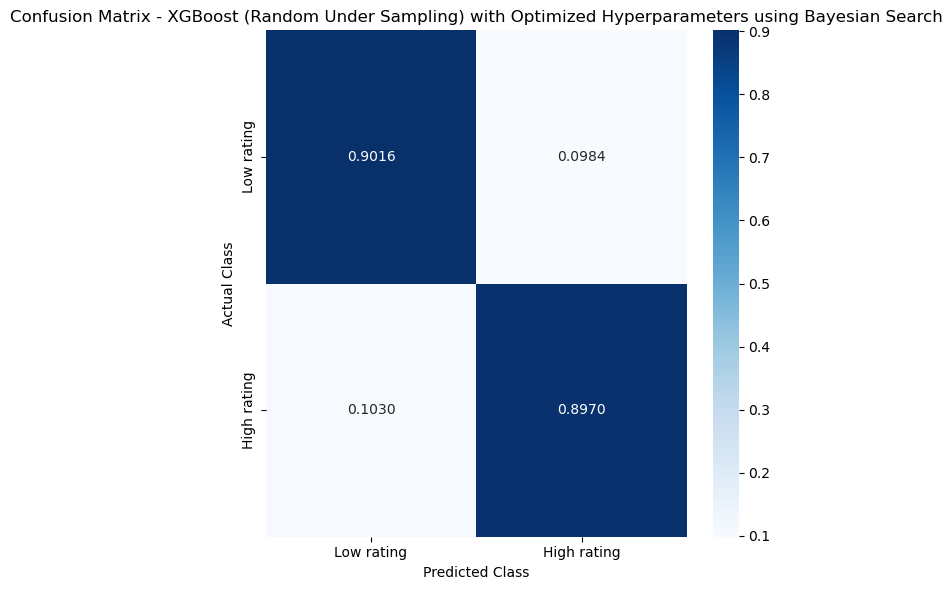

In [31]:
# Fit the default XGBoost model with Random Under Sampling
xgb_model = XGBClassifier(random_state=1234)
xgb_model.fit(X_train_resampled, y_train_resampled)  # Fit the default model

# Combine models for evaluation
models = {
    'XGBoost (Random Under Sampling) with Default Hyperparameters': xgb_model,  # Default model
    'XGBoost (Random Under Sampling) with Optimized Hyperparameters using Grid Search': grid_search.best_estimator_,  # Grid Search best model
    'XGBoost (Random Under Sampling) with Optimized Hyperparameters using Bayesian Search': bayes_search.best_estimator_  # Bayesian Search best model
}

def evaluate_models(models, X_test, y_test):
    plt.figure(figsize=(12, 18))  # Adjust figure size for readability

    # Plot ROC curve
    plt.subplot(2, 1, 1)  # First row for the ROC curve
    for model_name, model in models.items():
        # Predict probabilities for ROC curve
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.title('Combined ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    # Confusion Matrices: one matrix per row
    for i, (model_name, model) in enumerate(models.items()):
        plt.figure(figsize=(6, 6))  # Separate figure for each confusion matrix

        # Predict labels
        y_pred = model.predict(X_test)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred, normalize='true')

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt=".4f", cmap='Blues',
                    xticklabels=["Low rating", "High rating"],
                    yticklabels=["Low rating", "High rating"])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")

    plt.tight_layout()  # Adjust layout
    plt.show()

# Evaluate models after tuning
print("Comparison of XGBoost models (Random Under Sampling) with Default hyperparameters vs Optimized hyperparameters:")
evaluate_models(models, X_test, y_test)